# Pengumpulan data

# Data Integration dan Analisis Data IRIS  
Deskripsi Proyek
Proyek ini bertujuan untuk mengambil data IRIS dari dua database yang berbeda (PostgreSQL dan MySQL), menggabungkannya menjadi satu dataset, melakukan profiling data (statistik deskriptif), dan melakukan eksplorasi data melalui visualisasi.

Struktur Data  
Data IRIS tersimpan dalam dua database:  

PostgreSQL (irisPostgre): Menyimpan kolom sepal_length, sepal_width, dan class.
MySQL (irisSQL): Menyimpan kolom petal_length, petal_width, dan class.
Setiap tabel memiliki kolom id yang dapat digunakan untuk menggabungkan kedua dataset.

Langkah-Langkah  
Mengambil Data dari PostgreSQL dan MySQL  

Terhubung ke PostgreSQL dan MySQL menggunakan psycopg2 dan pymysql.
Menjalankan query SQL untuk mengambil data dari masing-masing database.
Menggabungkan Data  

Menggunakan pd.merge() untuk menggabungkan data berdasarkan id dan class.
Memastikan tidak ada duplikasi kolom class.
Profiling Data  

Menggunakan df.describe() untuk melihat statistik deskriptif seperti mean, std, min, max, dan quantile.
Eksplorasi Data dengan Visualisasi  

Menggunakan seaborn untuk membuat pairplot yang menampilkan hubungan antar fitur dengan warna berdasarkan class.


Statistik Deskriptif:
               id  sepal_length  sepal_width  petal_length  petal_width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.054000      3.758667     1.198667
std     43.445368      0.828066     0.433594      1.764420     0.763161
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


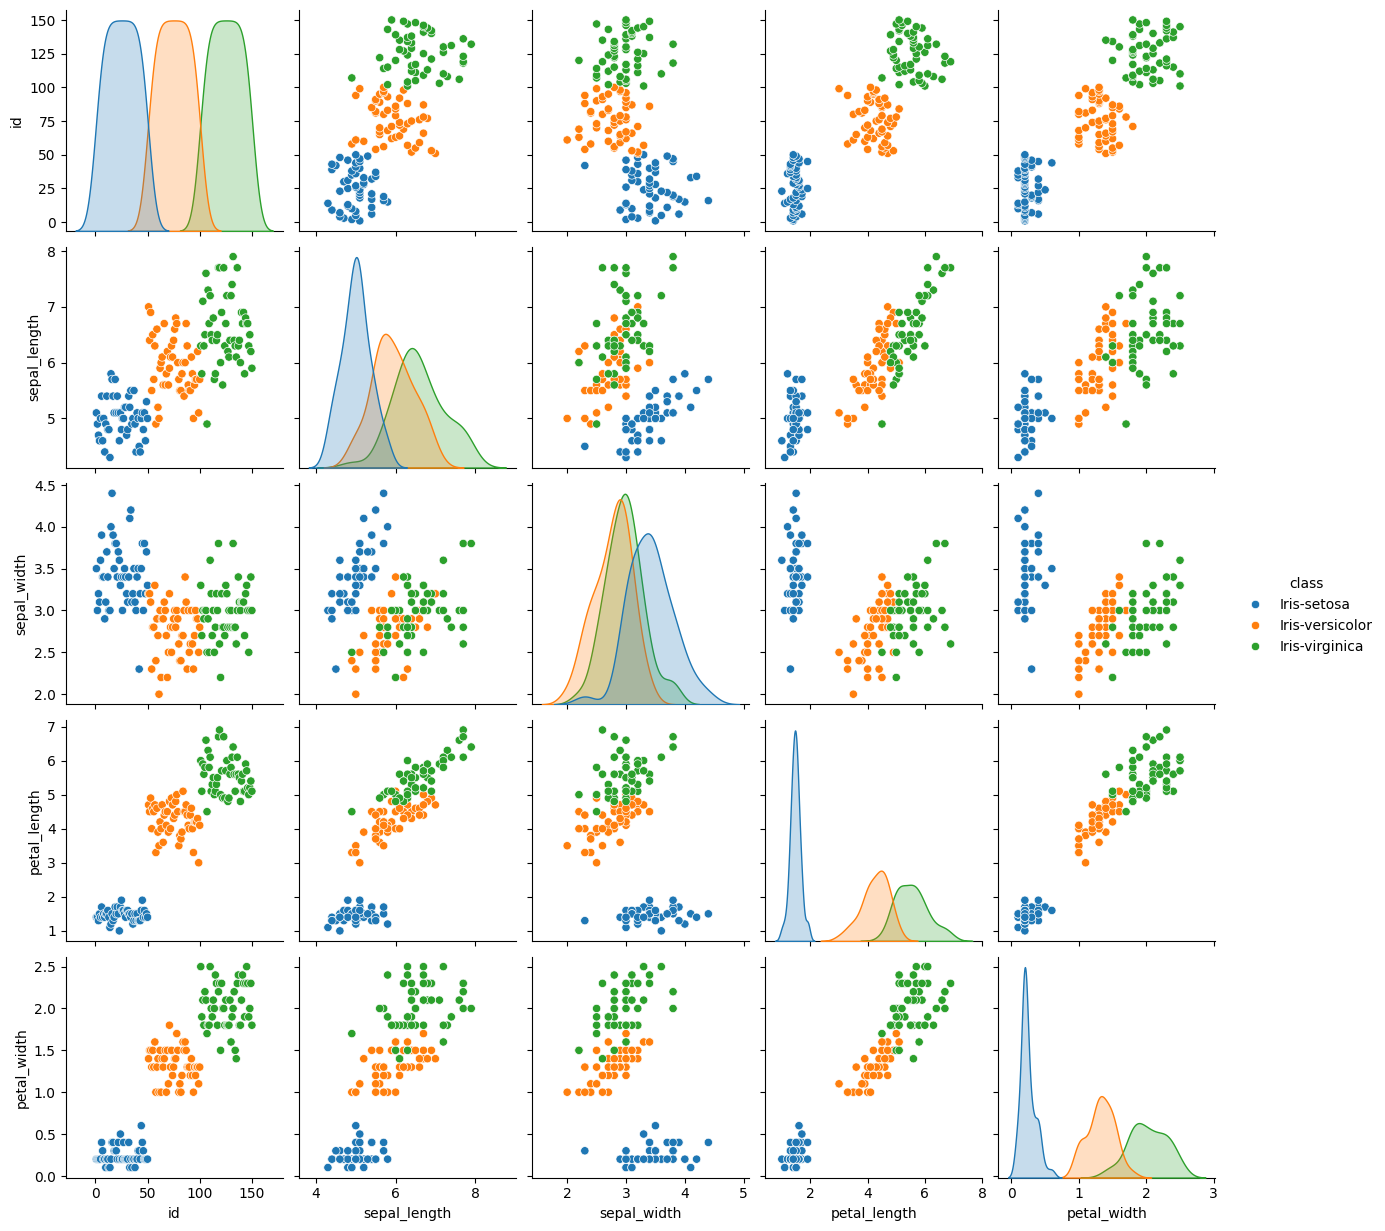

In [3]:
import psycopg2
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Koneksi ke PostgreSQL
pg_conn = psycopg2.connect(
    dbname="defaultdb",
    user="avnadmin",
    password="AVNS_RXRKVCrwzjE7ECInaHa",
    host="pg-3e9f6d55-tuhuwkwk-f38a.h.aivencloud.com",
    port="25886"
)
pg_cur = pg_conn.cursor()

# Koneksi ke MySQL
mysql_conn = pymysql.connect(
    host="mysql-3f502423-tuhuwkwk-f38a.h.aivencloud.com",
    user="avnadmin",
    password="AVNS_2ByB5ZbPXeYhBHP6anG",
    database="defaultdb",
    port=25886,
    ssl={"ssl": {}}
)
mysql_cur = mysql_conn.cursor()

# Ambil data dari PostgreSQL
pg_cur.execute("SELECT id, sepal_length, sepal_width, class FROM irisPostgre;")
pg_data = pg_cur.fetchall()

# Ambil data dari MySQL
mysql_cur.execute("SELECT id, petal_length, petal_width, class FROM irisSQL;")
mysql_data = mysql_cur.fetchall()

# Buat DataFrame dengan kolom yang sesuai
df_pg = pd.DataFrame(pg_data, columns=["id", "sepal_length", "sepal_width", "class"])
df_mysql = pd.DataFrame(mysql_data, columns=["id", "petal_length", "petal_width", "class"])

# Gabungkan data berdasarkan 'id' dan pastikan tidak ada duplikasi kolom 'class'
df_combined = pd.merge(df_pg, df_mysql, on=["id", "class"], how="inner")

# Tampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_combined.describe())

# Visualisasi sebaran data
sns.pairplot(df_combined, hue="class", diag_kind="kde")
plt.show()

# Tutup koneksi
pg_cur.close()
pg_conn.close()
mysql_cur.close()
mysql_conn.close()
